<a href="https://colab.research.google.com/github/JoshiRawr/CCMACLRL_EXERCISES_COM231/blob/main/Midterms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np



## Dataset


In [2]:
dataset_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/train.csv?raw=true'
traindata = pd.read_csv(dataset_url)
traindata.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [3]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

## Train-Test Split

In [4]:
X = traindata.drop(columns=["FloodProbability", "id"])
y = traindata["FloodProbability"]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Linear Regression Model


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [7]:
r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2}")

R² Score: 0.8448773362840329


## Visualization



/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


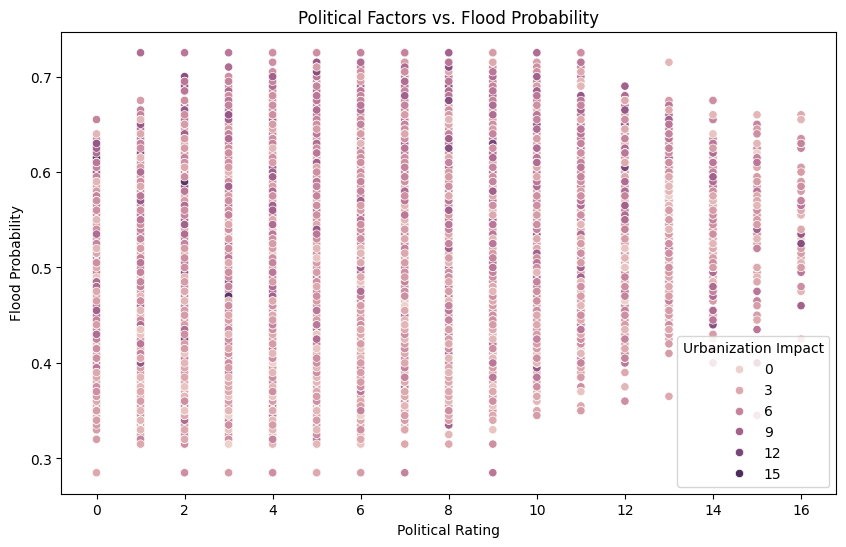

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=traindata, x='PoliticalFactors', y='FloodProbability', hue='Deforestation')
plt.title('Political Factors vs. Flood Probability')
plt.xlabel('Political Rating')
plt.ylabel('Flood Probability')
plt.legend(title='Urbanization Impact')
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


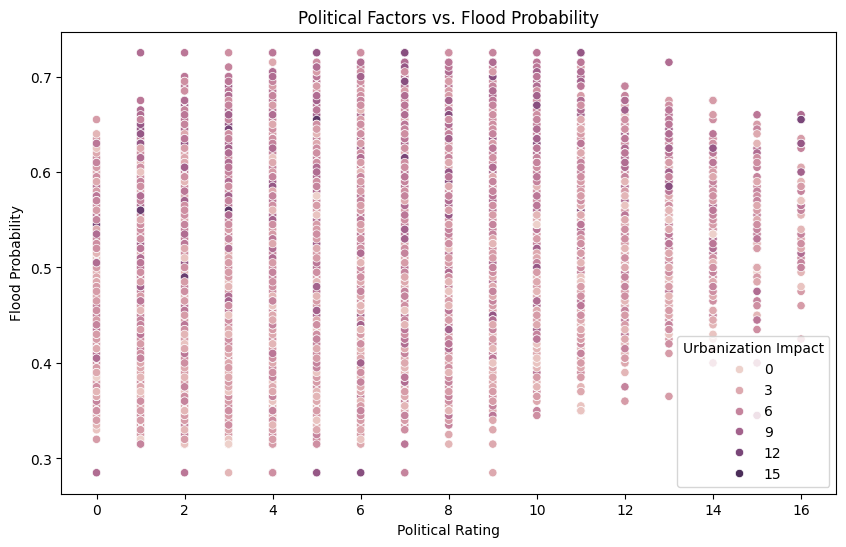

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=traindata, x='PoliticalFactors', y='FloodProbability', hue='DrainageSystems')
plt.title('Political Factors vs. Flood Probability')
plt.xlabel('Political Rating')
plt.ylabel('Flood Probability')
plt.legend(title='Urbanization Impact')
plt.show()

**Fitted Plot**

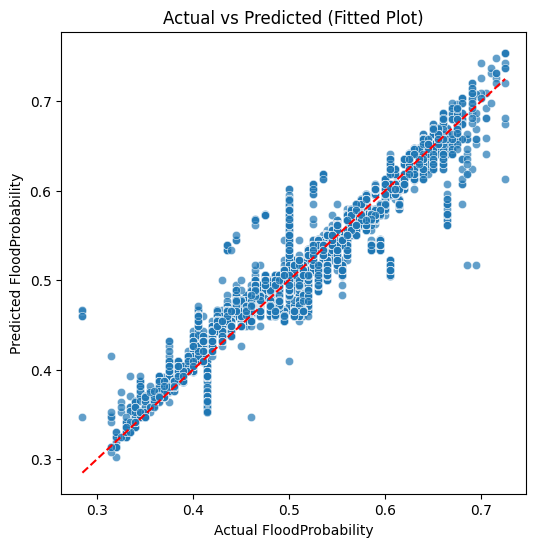

In [10]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual FloodProbability")
plt.ylabel("Predicted FloodProbability")
plt.title("Actual vs Predicted (Fitted Plot)")
plt.show()


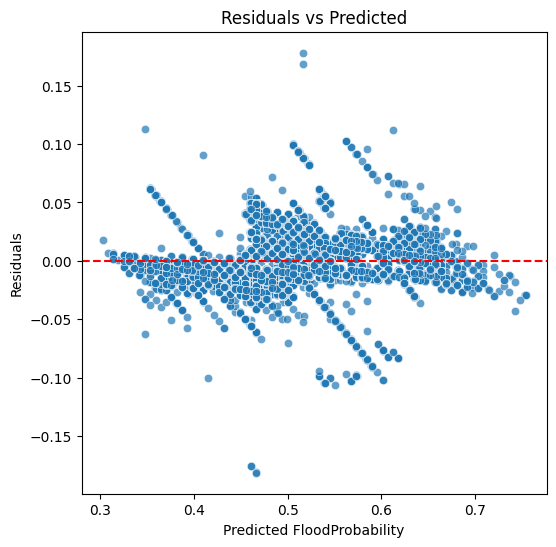

In [11]:
residuals = y_test - y_pred

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted FloodProbability")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


**Correlation Matrix**

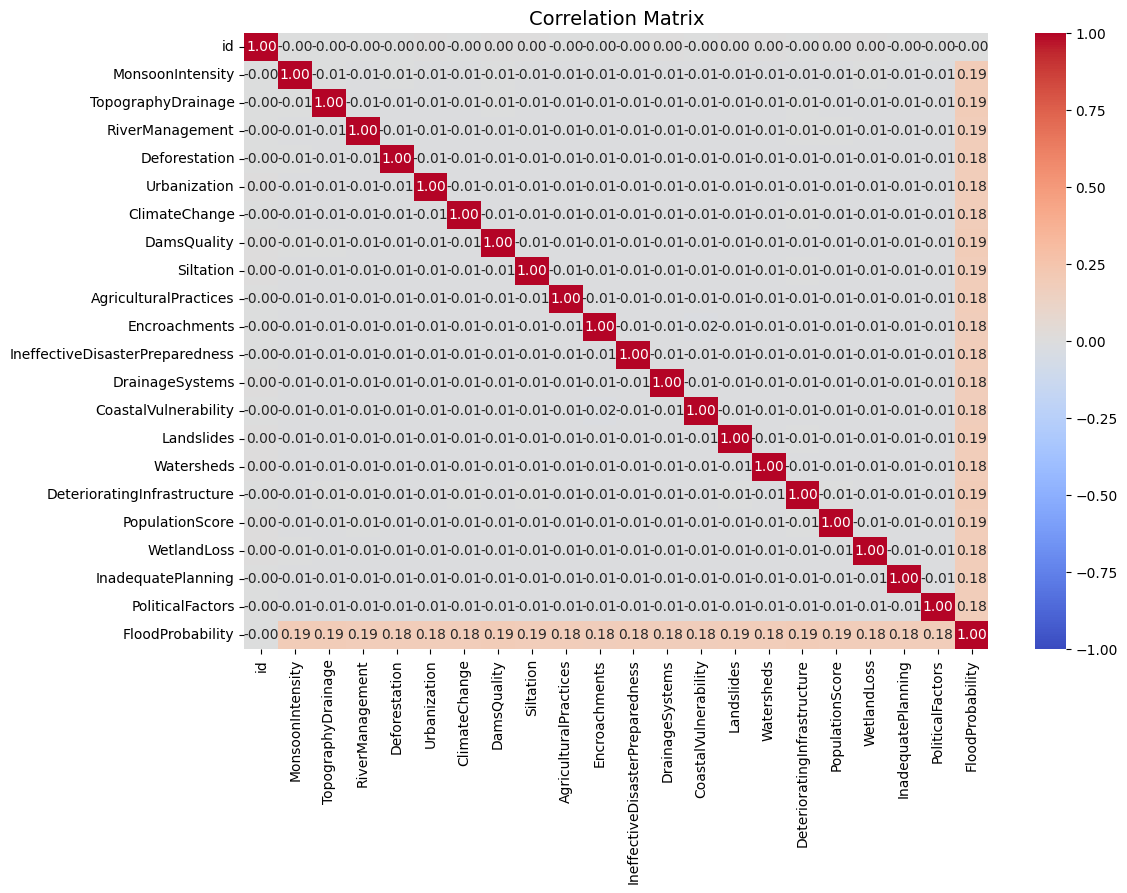

In [12]:
correlation = traindata.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, fmt=".2f", vmin=-1, vmax=1, center=0, cmap="coolwarm")
plt.title("Correlation Matrix", fontsize=14)
plt.show()

## Test File




In [13]:
test_url = "https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/test.csv?raw=true"
testdata = pd.read_csv(test_url)

testdata.head()


,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5


## Sample Submission File

In [14]:
sample_submission_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/sample_submission.csv?raw=true'
samplefile = pd.read_csv(sample_submission_url)

X_final = testdata.drop(columns=["id"])
y_pred = model.predict(X_final)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'id': samplefile['id'],
    'FloodProbability': y_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv("submission_file.csv", index=False)
print("Submission file created: submission_file.csv")

print(submission_df.head())

Submission file created: submission_file.csv
        id  FloodProbability
0  1117957          0.573613
1  1117958          0.455271
2  1117959          0.454752
3  1117960          0.466179
4  1117961          0.466085
